# Deep Learning Course - LAB 1

## Intro to PyTorch

PyTorch (PT) is a Python (and C++) library for Machine Learning (ML) particularly suited for Neural Networks and their applications.

Its great selection of built-in modules, models, and functions, CUDA capability, tensor arithmetic support and automatic differentiation functionality make it one of the most used scientific libraries for Deep Learning.

### Installing PyTorch

We advise to install PyTorch following the directions given in its [home page](https://pytorch.org/get-started/locally/). Just typing `pip install torch` may not be the correct action as you have to take into account the compatibility with `cuda`. If you have `cuda` installed, you can find your version by typing `nvcc --version` in a terminal (Linux/iOS). 

If you're using Windows, we first suggest first to install Anaconda and then install PyTorch from the `anaconda prompt` software via `conda` (preferably) or `pip`.

If you're using Google Colab, all the libraries needed to follow this lecture should be pre-installed there.

We see now how to operate on Colab.

### For Colab users

Google Colab is a handy tool that we suggest you use for this course---especially if your laptop does not support CUDA or has limited hardware capabilities. Anyway, note that **we'll try to avoid GPU code as much as possible**.

Essentially, Colab renders available to you a virtual machine with a limited hardware capability and disk where you can execute your code inside a given time window. You can even ask for a GPU (if you use it too much you'll need to start waiting a lot before it's available though).

#### Your (maybe) first Colab commands

Colab Jupyter-style notebook interface with a few tweaks.

For instance, you may run (some) bash command from here prepending `!` to your code.

In [ ]:
!ls

In [ ]:
!pwd

In [ ]:
!git clone https://github.com/mnzluca/IntroToAI

This makes it very easy to operate your virtual machine without the need for a terminal. 

#### File transfer on Colab

One of the most intricate action in Colab is file transfer. Since your files reside on the virtual machine, there're two main ways to operate file transfer on Colab.

* `files.download()` / `.upload()`

In [ ]:
from google.colab import files
files.upload()

In [2]:
files.download("sample_data/README.md")

NameError: name 'files' is not defined

Although it may be much more handy to connect your Google Drive to Colab. Here is a snippet that lets you do this.

In [ ]:
from google.colab import drive

folder_mount = '/content/drive' # Your Drive will be mounted on top of this path

drive.mount(folder_mount)

### Dive into PyTorch - connections with NumPy

Like NumPy, PyTorch provides its own multidimensional array class, called `Tensor`. `Tensor`s are essentially the equivalent of NumPy `ndarray`s.
If we wish to operate a very superficial comparison between `Tensor` and `ndarray`, we can say that:
* `Tensor` draws a lot of methods from NumPy, although it's missing some (see [this GitHub issue](if you're interested))
* `Tensor` is more OO than `ndarray` and solves some inconsistencies within NumPy
* `Tensor` has CUDA support

In [62]:
import torch
import numpy as np

# create custom Tensor and ndarray
x = torch.Tensor([[1,5,4],[3,2,1]])
y = np.array([[1,5,4],[3,2,1]])

def pretty_print(obj, title=None):
    if title is not None:
        print(title)
    print(obj)
    print("\n")

pretty_print(x, "x")
pretty_print(y, "y")

x
tensor([[1., 5., 4.],
        [3., 2., 1.]])


y
[[1 5 4]
 [3 2 1]]




What are the types of these objs?

In [5]:
x.dtype, y.dtype

(torch.float32, dtype('int32'))

`torch` already thinks with Machine Learning in mind as the `Tensor` is implicitly converted to `dtype float32`, while NumPy makes no such assumption.ù

As in NumPy, we can call the `.shape` attribute to get the shape of the structures. Moreover, `Tensor`s have also the `.size()` method which is analogous to `.shape`.

In [7]:
x.shape, y.shape, x.size()

(torch.Size([2, 3]), (2, 3), torch.Size([2, 3]))

Notice how a `Tensor` shape is **not** a tuple.

We can also create a random `Tensor` analogously to NumPy.

A `2 × 3 × 3` `Tensor` is the same as saying "2 3 × 3 matrices", or a "cubic matrix"

![](img/tensors.jpg)

In [64]:
x = torch.rand([2, 3, 3])
x

tensor([[[0.9075, 0.3282, 0.6428],
         [0.1238, 0.5174, 0.7906],
         [0.4972, 0.0083, 0.9456]],

        [[0.0233, 0.0804, 0.1670],
         [0.6405, 0.3106, 0.9403],
         [0.0926, 0.2227, 0.2389]]])

In [4]:
y = np.random.rand(2, 3, 3)
y

array([[[0.41036214, 0.28587342, 0.91145268],
        [0.15027504, 0.45377417, 0.55654618],
        [0.20955594, 0.72104528, 0.22529777]],

       [[0.95001789, 0.29200055, 0.16068889],
        [0.79229758, 0.18374119, 0.51103874],
        [0.38043905, 0.65597989, 0.78787944]]])

#### Slicing a `Tensor`

You can slice a `Tensor` (*i.e.*, extract a substructure of a `Tensor`) as in NumPy using the square brackets:

In [65]:
# extract first element (i.e., matrix) of first dimension
pretty_print(x[0], "Slice first element")

# extract a specific element
pretty_print(x[1,2,0], "Slice element at (0, 1, 2)")

# extract first element of second dimension (":" means all the elements of the given dim)
pretty_print(x[:, 0], "Slice first element of second dim")

# note that it is equivalent to
pretty_print(x[:, 0, :], "As above")

# extract range of dimensions (first and second element of third dim) 
pretty_print(x[:, :, 0:2], "Slice first and second el of third dim")

# note that it is equivalent to (i.e., you can also pass list for slicing, as opposed to Py vanilla lists/tuples)
pretty_print(x[:, :, (0, 1)], "As above")

Slice first element
tensor([[0.9075, 0.3282, 0.6428],
        [0.1238, 0.5174, 0.7906],
        [0.4972, 0.0083, 0.9456]])


Slice element at (0, 1, 2)
tensor(0.0926)


Slice first element of second dim
tensor([[0.9075, 0.3282, 0.6428],
        [0.0233, 0.0804, 0.1670]])


As above
tensor([[0.9075, 0.3282, 0.6428],
        [0.0233, 0.0804, 0.1670]])


Slice first and second el of third dim
tensor([[[0.9075, 0.3282],
         [0.1238, 0.5174],
         [0.4972, 0.0083]],

        [[0.0233, 0.0804],
         [0.6405, 0.3106],
         [0.0926, 0.2227]]])


As above
tensor([[[0.9075, 0.3282],
         [0.1238, 0.5174],
         [0.4972, 0.0083]],

        [[0.0233, 0.0804],
         [0.6405, 0.3106],
         [0.0926, 0.2227]]])




In Py, you can also slice any list by interval via the "double colon" notation `::` (`from`:`to - 1`:`step`). Note that `::3` means "take all elements of the object by step of 3 starting from 0 until the list ends".

In [34]:
torch.range(0, 10)[0:7:3]

tensor([0., 3., 6.])

#### `Tensor` supports linear algebra

In [67]:
z1 = torch.rand([4, 5])
print("z1")
print(z1.shape)
print(z1)

# transposition
z2 = z1.T

print("\nz2")
print(z2.shape)
print(z2)

z1
torch.Size([4, 5])
tensor([[0.6182, 0.8421, 0.5606, 0.5392, 0.4711],
        [0.2708, 0.9917, 0.0571, 0.7530, 0.7690],
        [0.0237, 0.1496, 0.9775, 0.4337, 0.0743],
        [0.0614, 0.2610, 0.9684, 0.8846, 0.8239]])

z2
torch.Size([5, 4])
tensor([[0.6182, 0.2708, 0.0237, 0.0614],
        [0.8421, 0.9917, 0.1496, 0.2610],
        [0.5606, 0.0571, 0.9775, 0.9684],
        [0.5392, 0.7530, 0.4337, 0.8846],
        [0.4711, 0.7690, 0.0743, 0.8239]])


In [68]:
# matrix multiplication
pretty_print(z1 @ z2, "Matrix multiplication: with '@`")

# equivalent to
pretty_print(torch.matmul(z1, z2), "Matrix multiplication: with torch.matmul")

# and also
pretty_print(z1.matmul(z2), "Matrix multiplication: with Tensor.matmul")

Matrix multiplication: with '@`
tensor([[1.9182, 1.8028, 0.9575, 1.6659],
        [1.8028, 2.2183, 0.5944, 1.6305],
        [0.9575, 0.5944, 1.1720, 1.4320],
        [1.6659, 1.6305, 1.4320, 2.4711]])


Matrix multiplication: with torch.matmul
tensor([[1.9182, 1.8028, 0.9575, 1.6659],
        [1.8028, 2.2183, 0.5944, 1.6305],
        [0.9575, 0.5944, 1.1720, 1.4320],
        [1.6659, 1.6305, 1.4320, 2.4711]])


Matrix multiplication: with Tensor.matmul
tensor([[1.9182, 1.8028, 0.9575, 1.6659],
        [1.8028, 2.2183, 0.5944, 1.6305],
        [0.9575, 0.5944, 1.1720, 1.4320],
        [1.6659, 1.6305, 1.4320, 2.4711]])




Note that `@` identifies the matrix product.

Don't mistake `@` and `*` as the latter is the Hadamard (element-by-element) product!

In [41]:
z1 * z2 # this gives an Exception

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 1

In [24]:
z1 * z1

tensor([[0.8051, 0.8918, 0.1943, 0.9058, 0.0430],
        [0.1791, 0.0034, 0.7147, 0.8877, 0.1794],
        [0.6832, 0.5701, 0.2725, 0.0767, 0.1976],
        [0.4425, 0.9179, 0.4899, 0.3608, 0.1656]])

Generally, the "regular" arithmetic operators for Python act as element-wise operators in `Tensor`s (as in `ndarrays`)

In [25]:
z1 ** 2 # Equivalent to above

tensor([[0.8051, 0.8918, 0.1943, 0.9058, 0.0430],
        [0.1791, 0.0034, 0.7147, 0.8877, 0.1794],
        [0.6832, 0.5701, 0.2725, 0.0767, 0.1976],
        [0.4425, 0.9179, 0.4899, 0.3608, 0.1656]])

In [69]:
z3 = torch.Tensor([[1,2,3,4,7],[0.2,2,4,5,3],[-1,3,-4,2,2],[1,1,1,1,2]])
pretty_print(z1 % z3, "z1 % z3 (remainder of integer division)")
pretty_print(z3 // z1, "z3 // z1 (integer division)") # integer division
z3 /= z1
pretty_print(z3, "in-place tensor division")

z1 % z3 (remainder of integer division)
tensor([[ 0.6182,  0.8421,  0.5606,  0.5392,  0.4711],
        [ 0.0708,  0.9917,  0.0571,  0.7530,  0.7690],
        [-0.9763,  0.1496, -3.0225,  0.4337,  0.0743],
        [ 0.0614,  0.2610,  0.9684,  0.8846,  0.8239]])


z3 // z1 (integer division)
tensor([[  1.,   2.,   5.,   7.,  14.],
        [  0.,   2.,  70.,   6.,   3.],
        [-42.,  20.,  -4.,   4.,  26.],
        [ 16.,   3.,   1.,   1.,   2.]])


in-place tensor division
tensor([[  1.6177,   2.3751,   5.3515,   7.4179,  14.8575],
        [  0.7384,   2.0168,  70.0059,   6.6404,   3.9012],
        [-42.2678,  20.0486,  -4.0922,   4.6114,  26.9138],
        [ 16.2813,   3.8308,   1.0326,   1.1304,   2.4276]])




As for `ndarrays`, `Tensor`s arithmetic operations support **broadcasting**. Roughly speaking, when two `Tensor`s have different shapes and a binary+ operator is applied to them, PT will try to find a way to make these objects "compatible" for the operation. 

Of course, broadcasting is not always possible, but as a rule of thumb, if some dimensions of a `Tensor` are one and the other dimensions are the same, broadcasting works.

In [77]:
small_vector_5 = torch.Tensor([1,2,3,5,2]) # this is treated as a row vector (1 x 5 matrix)
print("small_vector_5:", small_vector_5, "; Shape:", small_vector_5.shape, "\n")

pretty_print(z1 / small_vector_5, "Broadcasting: dividing matrix by row vector")

small_vector_4 = torch.Tensor([4,2,3,1])
small_vector_4 = small_vector_4.unsqueeze(-1) # this operation "transposes" the vector into a column vector (4 x 1 matrix)
print("small_vector_4:\n", small_vector_4, "\nShape:", small_vector_4.shape, "\n")

pretty_print(z1 / small_vector_4, "Broadcasting: dividing matrix by column vector")

small_vector_5: tensor([1., 2., 3., 5., 2.]) ; Shape: torch.Size([5]) 

Broadcasting: dividing matrix by row vector
tensor([[0.6182, 0.4210, 0.1869, 0.1078, 0.2356],
        [0.2708, 0.4958, 0.0190, 0.1506, 0.3845],
        [0.0237, 0.0748, 0.3258, 0.0867, 0.0372],
        [0.0614, 0.1305, 0.3228, 0.1769, 0.4119]])


small_vector_4:
 tensor([[4.],
        [2.],
        [3.],
        [1.]]) 
Shape: torch.Size([4, 1]) 

Broadcasting: dividing matrix by column vector
tensor([[0.1545, 0.2105, 0.1401, 0.1348, 0.1178],
        [0.1354, 0.4958, 0.0286, 0.3765, 0.3845],
        [0.0079, 0.0499, 0.3258, 0.1446, 0.0248],
        [0.0614, 0.2610, 0.9684, 0.8846, 0.8239]])




In [45]:
torch.Tensor([1,2,3]) == torch.Tensor([[1,2,3]]) # single-dim Tensors are also row vectors

tensor([[True, True, True]])

We already saw a case of incompatible `Tensor`s above.

Some more lineal algebra...


In [78]:
z3_norm = z3.norm(2)
pretty_print(z3_norm, "Tensor norm")
pretty_print(np.linalg.norm(y), "ndarray norm") # notice how torch is more OO

Tensor norm
tensor(92.2838)


ndarray norm
7.483314773547883




Notice how methods reducing `Tensor`s to scalars still return singleton `Tensor`s. (be wary of this feature when scripting something in PT)

To "disentangle" the scalar from a `Tensor` use the `.item()` method.

In [35]:
z3_norm.item()

51.5969352722168

#### Seamless conversion from NumPy to PT

In [81]:
y_torch = torch.from_numpy(y)
pretty_print(y_torch, "y converted to torch.Tensor")

x_numpy = x.numpy()
pretty_print(x_numpy, "x converted to numpy.ndarray")

# Note that NumPy implicitly converts Tensor to ndarray whenever it can; the same doesn't happen for PT
pretty_print(np.linalg.norm(x), "Example of implicit conversion Tensor → ndarray")

y converted to torch.Tensor
tensor([[1, 5, 4],
        [3, 2, 1]], dtype=torch.int32)


x converted to numpy.ndarray
[[[0.9074899  0.32821608 0.64279073]
  [0.12377012 0.51739407 0.7906445 ]
  [0.4972009  0.00826526 0.9455616 ]]

 [[0.02333057 0.08041859 0.16697049]
  [0.6404953  0.3105638  0.9402961 ]
  [0.09256816 0.222704   0.23891562]]]


Example of implicit conversion Tensor → ndarray
2.221468




#### Stochastic functionalities

In [102]:
pretty_print(torch.randperm(10), "(randperm) Random permutation of 0:10")

pretty_print(torch.rand_like(z1), "(rand_like) Create random vector with the same shape of z_1")

pretty_print(torch.randint(10, (3, 3)), "(randint) Like rand, but with integers up to 10")

pretty_print(torch.normal(0, 1, (3, 3)), "(normal) Sampling a 3x3 iid scalars from N(0,1)")

pretty_print(torch.normal(torch.Tensor([[1,2,3],[4,5,6],[0,0,0]]), torch.Tensor([[1,0.5,0.9],[0.5,1,0.1],[3,4,1]])), "Sampling from 9 normals with different means and std into a (3x3) Tensor")

(randperm) Random permutation of 0:10
tensor([4, 7, 2, 6, 1, 9, 8, 0, 5, 3])


(rand_like) Create random vector with the same shape of z_1
tensor([[0.3826, 0.8858, 0.4603, 0.1621, 0.3258],
        [0.3917, 0.5695, 0.8140, 0.6596, 0.1741],
        [0.3374, 0.6738, 0.6525, 0.5383, 0.5528],
        [0.3606, 0.1887, 0.1684, 0.3050, 0.1850]])


(randint) Like rand, but with integers up to 10
tensor([[7, 2, 8],
        [9, 0, 1],
        [5, 4, 0]])


(normal) Sampling a 3x3 iid scalars from N(0,1)
tensor([[-0.2917,  0.5465, -2.2633],
        [ 0.5990,  1.8457,  0.7682],
        [ 0.6011,  0.8857, -1.0599]])


Sampling from 9 normals with different means and std into a (3x3) Tensor
tensor([[ 0.6668,  2.3454,  2.8719],
        [ 4.7201,  6.2344,  6.3202],
        [ 4.7931,  5.9379, -1.4390]])


tensor([[-0.1114, -3.1255,  3.0000],
        [ 0.0126, -3.3280,  3.0000],
        [ 0.0000, -3.0000,  3.9604]])




### Using GPUs

All `Torch.Tensor` methods support GPU computation via built-in CUDA wrappers.

Just transfer the involved `Tensor`s to CUDA and let the magic happen :)

In [104]:
# check if cuda is available on this machine
torch.cuda.is_available()


False

In [103]:
dim = 10000
large_cpu_matrix = torch.rand((dim, dim)) 
large_gpu_matrix = large_cpu_matrix.to("cuda") # Can also specify "cuda:gpu_id" if multiple GPUs

torch.Size([4, 5])

In [ ]:
import timeit

print("Norm of large cpu matrix. Time:", timeit.timeit("large_cpu_matrix.norm()", number=100))
print("Norm of large gpu matrix. Time:", timeit.timeit("large_gpu_matrix.norm()", number=100))

### Building easy ML models

By using all the pieces we've seen till now, we can build our first ML model using PyTorch

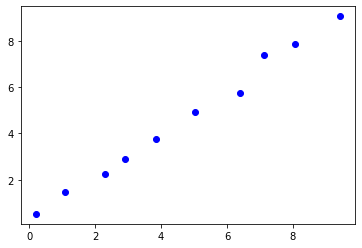

In [117]:
from matplotlib import pyplot as plt

x = torch.range(0, 9)
eps_x = torch.normal(0, .3, (10,))
x += eps_x

y = torch.range(0, 9)
eps_y = torch.normal(0, .3, (10,))
y += eps_y

plt.plot(x, y, "bo")
plt.show()